In [3]:
from testing import *

In [4]:
# from src import 
from src.models.qsar_OLS_pca import *

In [ ]:
df = pd.read_csv("src/data/IC50_df.csv")
cdk = ["Cyclin-dependent kinase 2/G1/S-specific cyclin-E1"]

model, X_train, X_test, y_train, y_test, scaler, pca = create_model(df, cdk)

R2 of the original model:  0.6263861946887793
R2 of the shuffled model:  0.22397147460423927
RMSE of the original model:  1.0413836328929928
RMSE of the shuffled model:  1.5008529139351108


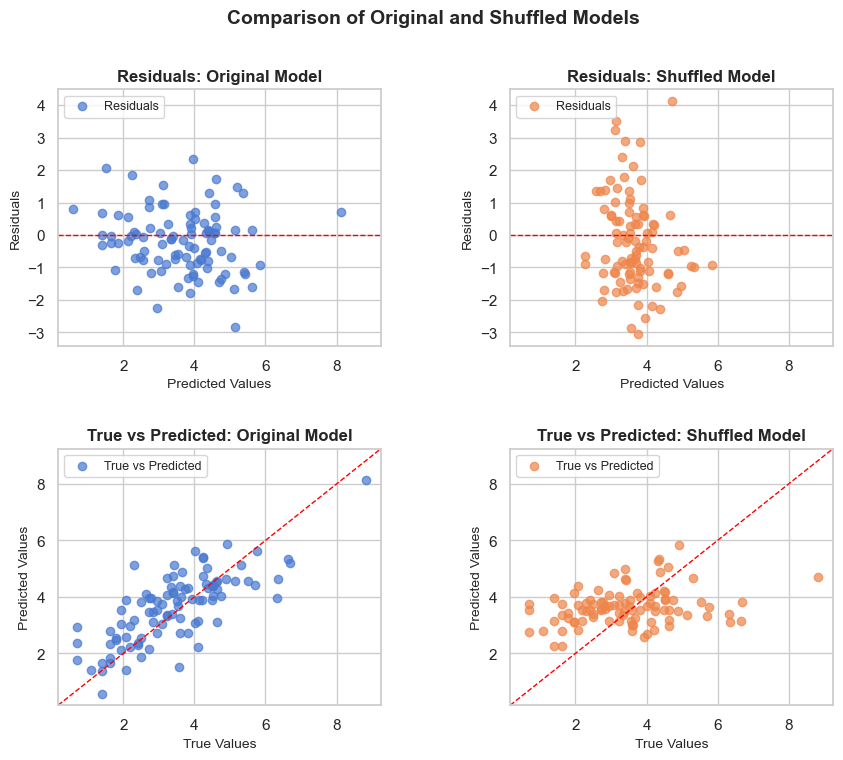

In [85]:
compare_cdkmodel_and_shuffled(model, y_train=y_train, X_train=X_train, y_test=y_test, X_test=X_test)

___________
Makes for models for all CDKs

In [86]:
# Choose top k CDKs which all contains at least 100 samples

list_cdks = df["Target Name"].unique()

In [87]:
len(list_cdks)

47

In [88]:
# Count how many samples each CDK has
count = df["Target Name"].value_counts()

# Choose the CDKs which all contains at least 100 samples
top_k_cdks = count[count >= 100].index
print(top_k_cdks)
print(len(top_k_cdks))

Index(['Cyclin-dependent kinase 2/G1/S-specific cyclin-E1',
       'Cyclin-dependent kinase 4/G1/S-specific cyclin-D1',
       'Cyclin-A2/Cyclin-dependent kinase 2', 'Cyclin-dependent kinase 2',
       'Cyclin-dependent kinase 4', 'Cyclin-dependent kinase 9',
       'Cyclin-dependent kinase/G2/mitotic-specific cyclin- 1',
       'Cyclin-dependent kinase 1',
       'Cyclin-dependent kinase 1/G2/mitotic-specific cyclin-B',
       'Cyclin-T1/Cyclin-dependent kinase 9', 'Cyclin-dependent kinase 6',
       'Cyclin-dependent kinase 5 activator 1 [99-307]',
       'Cyclin-dependent kinase 4/G1/S-specific cyclin-D1 [L188C]',
       'Cyclin-A2 [171-432]/Cyclin-dependent kinase 2'],
      dtype='object', name='Target Name')
14


In [89]:
count

Target Name
Cyclin-dependent kinase 2/G1/S-specific cyclin-E1                                1206
Cyclin-dependent kinase 4/G1/S-specific cyclin-D1                                 901
Cyclin-A2/Cyclin-dependent kinase 2                                               893
Cyclin-dependent kinase 2                                                         761
Cyclin-dependent kinase 4                                                         714
Cyclin-dependent kinase 9                                                         526
Cyclin-dependent kinase/G2/mitotic-specific cyclin- 1                             520
Cyclin-dependent kinase 1                                                         481
Cyclin-dependent kinase 1/G2/mitotic-specific cyclin-B                            464
Cyclin-T1/Cyclin-dependent kinase 9                                               405
Cyclin-dependent kinase 6                                                         271
Cyclin-dependent kinase 5 activator 1 [99-

In [90]:
# print status 
from tqdm import tqdm

models = []
r2 = []
rmse = []
counter = 0
for cdk in top_k_cdks:
    model , _, _, _, _ = create_model(df, [cdk])
    models.append(model)
    r2.append((cdk, model.rsquared))
    rmse.append((cdk, model.mse_resid**0.5))
    counter += 1


/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNING: please use MorganGenerator
[15:24:25] DEPRECATION WARNIN

In [91]:
# print status 
from tqdm import tqdm

models = []
r2 = []
rmse = []

# Wrap the `top_k_cdks` iterable with tqdm for the progress bar
for cdk in tqdm(top_k_cdks, desc="Processing CDKs"):
    model, _, _, _, _ = create_model(df, [cdk])
    models.append(model)
    r2.append((cdk, model.rsquared))
    rmse.append((cdk, model.mse_resid**0.5))

Processing CDKs:   0%|          | 0/14 [00:00<?, ?it/s]/Users/mathiasmarkvardsen/adaProject/ada-2024-project-forzada/src/models/helper_functions_qsar.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_IC50"] = np.log(df["IC50 (nM)"].values)
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: please use MorganGenerator
[15:24:36] DEPRECATION WARNING: p

In [92]:
# Create a DataFrame for the R2 and RMSE values
df_r2 = pd.DataFrame(r2, columns=["CDK", "R2"])
df_rmse = pd.DataFrame(rmse, columns=["CDK", "RMSE"])

# Merge the two DataFrames on the CDK column
df_combined = pd.merge(df_r2, df_rmse, on="CDK")

# Sort descending by R2
df_combined = df_combined.sort_values(by="R2", ascending=False)

/var/folders/sm/bpqf8wpj6478c8rtz31k076r0000gn/T/ipykernel_92697/388056302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CDK", x="R2", data=df_combined, palette="Blues_d", ax=ax[0])
/var/folders/sm/bpqf8wpj6478c8rtz31k076r0000gn/T/ipykernel_92697/388056302.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CDK", x="RMSE", data=df_combined, palette="Reds_d", ax=ax[1])


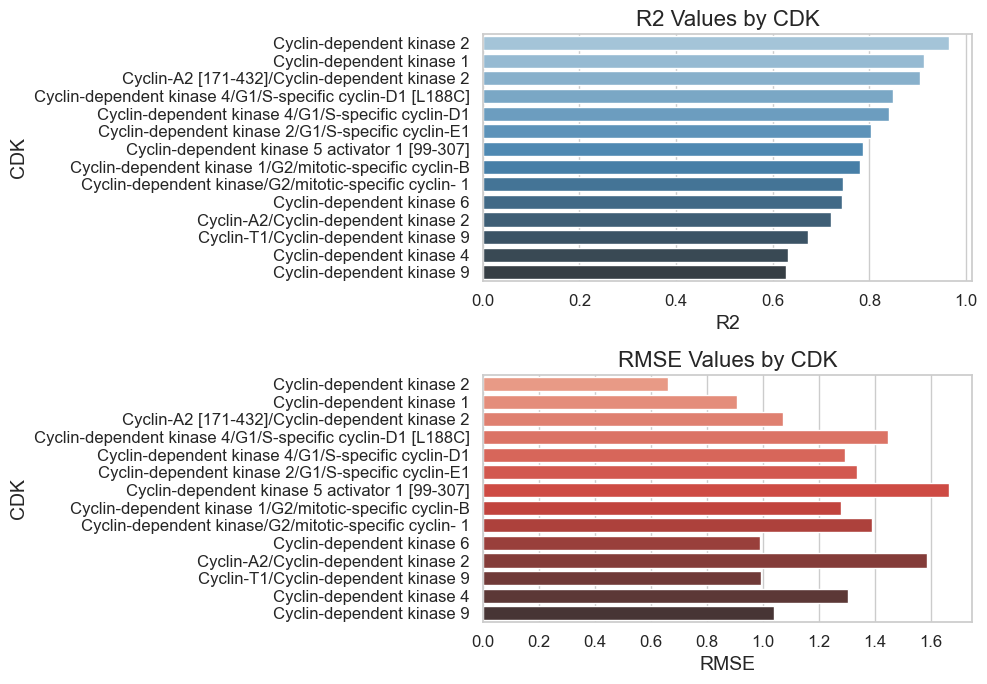

In [93]:
# Use Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot R2
sns.barplot(y="CDK", x="R2", data=df_combined, palette="Blues_d", ax=ax[0])
ax[0].set_title("R2 Values by CDK", fontsize=16)
ax[0].set_xlabel("R2", fontsize=14)
ax[0].set_ylabel("CDK", fontsize=14)
ax[0].tick_params(labelsize=12)

# Plot RMSE
sns.barplot(y="CDK", x="RMSE", data=df_combined, palette="Reds_d", ax=ax[1])
ax[1].set_title("RMSE Values by CDK", fontsize=16)
ax[1].set_xlabel("RMSE", fontsize=14)
ax[1].set_ylabel("CDK", fontsize=14)
ax[1].tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [94]:
print(scaler_cdk)

StandardScaler()


In [ ]:
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
paracetamol_smiles = "CC(=O)Nc1ccc(cc1)O"
ethanol_smiles = "CCO"

smiles_list = [aspirin_smiles, paracetamol_smiles, ethanol_smiles]

for smiles in smiles_list:
    pred = predict_log_affinity(model, smiles, scaler, pca)
    print(f"Expecting prediction for {smiles} (log): {pred}")
    print(f"Expecting prediction for {smiles} (nM): {np.exp(pred)}")


Expecting prediction for CC(=O)OC1=CC=CC=C1C(=O)O (log): [4.94379022]
Expecting prediction for CC(=O)OC1=CC=CC=C1C(=O)O (nM): [140.3010145]
Expecting prediction for CC(=O)Nc1ccc(cc1)O (log): [4.65010798]
Expecting prediction for CC(=O)Nc1ccc(cc1)O (nM): [104.59627899]
Expecting prediction for CCO (log): [3.5704853]
Expecting prediction for CCO (nM): [35.53383347]


[15:32:52] DEPRECATION WARNING: please use MorganGenerator
[15:32:52] DEPRECATION WARNING: please use MorganGenerator
[15:32:52] DEPRECATION WARNING: please use MorganGenerator
